C:\Users\Shubham Singh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


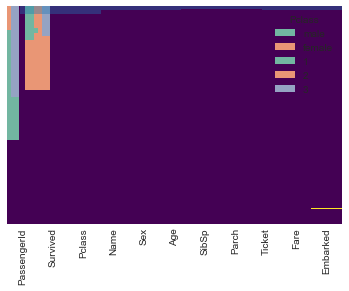

In [9]:
%matplotlib inline
import numpy as np
import seaborn as sns
import csv
import pandas as pd
import matplotlib.pyplot as plt

train=pd.read_csv("train.csv")
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='Set2')
sns.countplot(x='Survived',hue='Sex',data=train,palette='Set2')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='Set2')
sns.distplot(train['Age'].dropna(),kde=False,bins=30)
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
train.drop('Cabin',axis=1,inplace=True)
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
train.dropna(inplace=True)
sex=pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
train = pd.concat([train,sex,embark],axis=1)
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train.head()
train.drop('PassengerId',axis=1,inplace=True)
train.head()
from sklearn.linear_model import LogisticRegression
test = pd.read_csv('test.csv')
test.head()
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
test['Age']=test[['Age','Pclass']].apply(impute_age,axis=1)
test.drop('Cabin',axis=1,inplace=True)
sex=pd.get_dummies(test['Sex'],drop_first=True)
embark = pd.get_dummies(test['Embarked'],drop_first=True)
test = pd.concat([test,sex,embark],axis=1)
test['Fare'].fillna(test['Fare'].median(), inplace=True)
test['Fare'].isnull().value_counts()
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
test.head()
combine = [train,test]
X_train = train.drop("Survived",axis=1)
Y_train = train["Survived"]
X_test = test.drop("PassengerId",axis=1).copy()
X_train.shape , Y_train.shape , X_test.shape
logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)
Y_pred = logmodel.predict(X_test)
acc_log = round(logmodel.score(X_train , Y_train) * 100, 2)
acc_log
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logmodel.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)
Submission = pd.DataFrame({"PassengerId":test["PassengerId"],
                          "Survived":Y_pred})
Submission
Submission.to_csv('titanic.csv',index=False)